### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



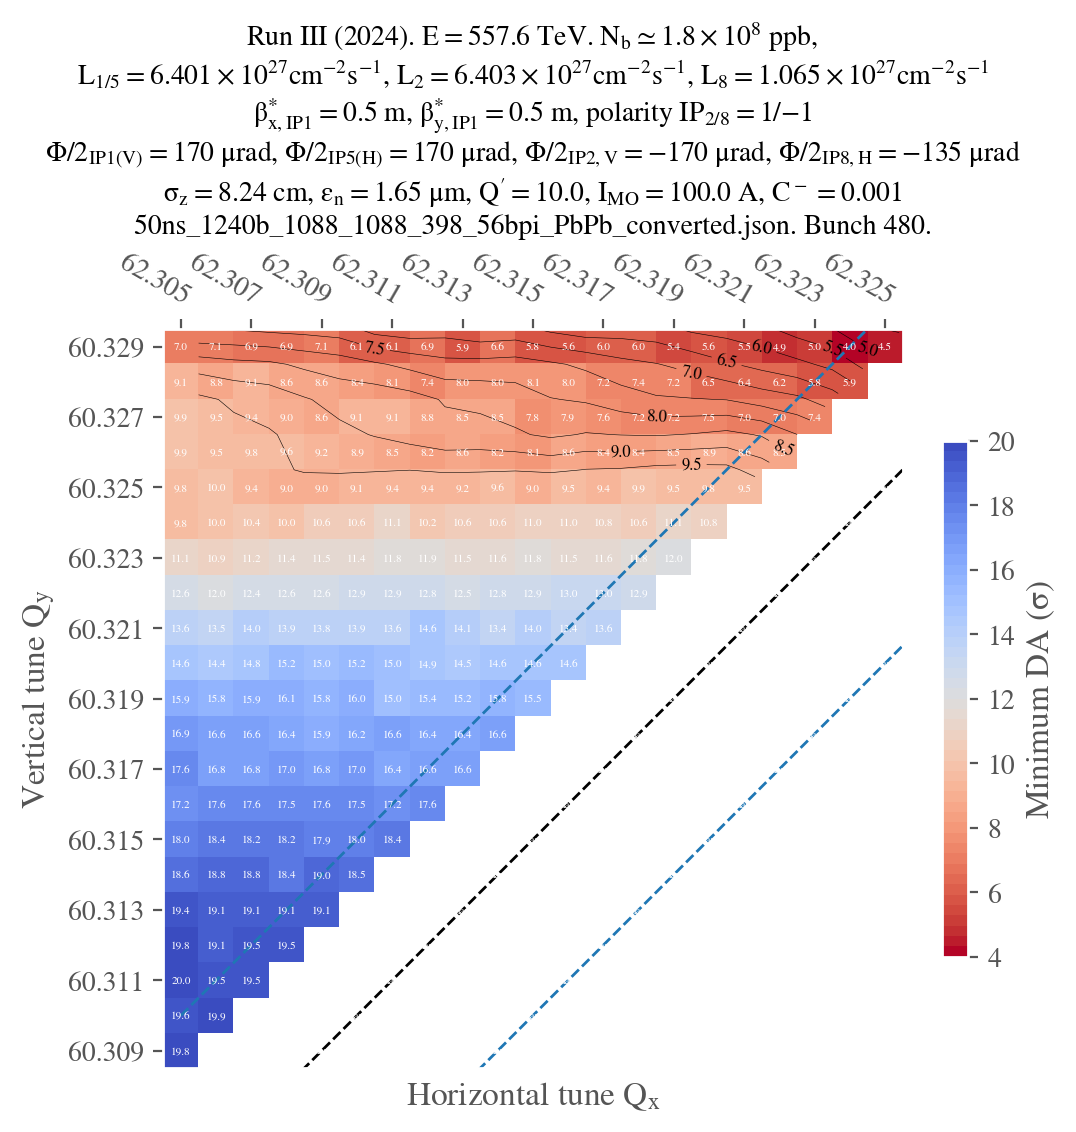

In [2]:
# Define study
STUDY_NAME = "tunescan_50cm_lower_emittance"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
# Replace nan with 20
df_to_plot.loc[60.311, 62.305] = 20

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=False,
    vmin = 4,
    vmax = 20.,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)

In [3]:
df


name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.309      base_collider                            19.750   
             60.310      base_collider                            19.625   
             60.311      base_collider                            19.375   
             60.312      base_collider                            19.750   
             60.313      base_collider                            19.375   
...                                ...                               ...   
      62.323 60.328      base_collider                             5.750   
             60.329      base_collider                             5.000   
      62.324 60.328      base_collider                             5.875   
             60.329      base_collider                             4.000   
      62.325 60.329      base_collider                             4.500   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.309  62.305  60.309  10.0  10.0       480.0      1363.0   
             60.310  62.305  60.310  10.0  10.0       480.0      1363.0   
             60.311  62.305  60.311  10.0  10.0       480.0      1363.0   
             60.312  62.305  60.312  10.0  10.0       480.0      1363.0   
             60.313  62.305  60.313  10.0  10.0       480.0      1363.0   
...                     ...     ...   ...   ...         ...         ...   
      62.323 60.328  62.323  60.328  10.0  10.0       480.0      1363.0   
             60.329  62.323  60.329  10.0  10.0       480.0      1363.0   
      62.324 60.328  62.324  60.328  10.0  10.0       480.0      1363.0   
             60.329  62.324  60.329  10.0  10.0       480.0      1363.0   
      62.325 60.329  62.325  60.329  10.0  10.0       480.0      1363.0   

                     num_particles_per_bunch  crossing_angle  
beam  qx     qy                                               
lhcb1 62.305 60.309              180000000.0           170.0  
             60.310              180000000.0           170.0  
             60.311              180000000.0           170.0  
             60.312              180000000.0           170.0  
             60.313              180000000.0           170.0  
...                                      ...             ...  
      62.323 60.328              180000000.0           170.0  
             60.329              180000000.0           170.0  
      62.324 60.328              180000000.0           170.0  
             60.329              180000000.0           170.0  
      62.325 60.329              180000000.0           170.0  

[231 rows x 10 columns]

In [4]:
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,19.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,19.625,19.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,20.000,19.500,19.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,19.750,19.125,19.500,19.500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,19.375,19.125,19.125,19.125,19.125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,18.625,18.750,18.750,18.375,19.000,18.500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,18.000,18.375,18.250,18.250,17.875,18.000,18.375,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,17.250,17.625,17.625,17.500,17.625,17.500,17.250,17.625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,17.625,16.750,16.750,17.000,16.750,17.000,16.375,16.625,16.625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
